In [7]:

from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')



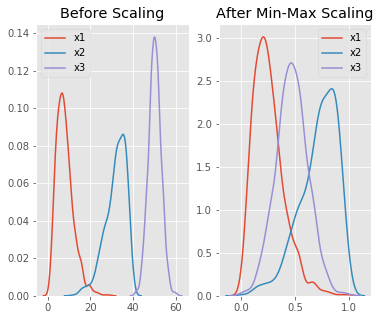

In [8]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

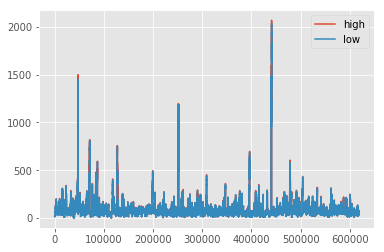

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
def test_run():
    df=pd.read_csv('all_stocks_5yr.csv')
    df[['high','low']].plot()
   
    plt.show()
    
if __name__ =="__main__":
    test_run()


In [67]:
import pandas as pd
df=pd.read_csv('all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [102]:
bycomp=df.groupby('Name')
Cmean=bycomp['close'].mean()
Cmean.head()


In [113]:
df1=df.loc[df['Name'] == 'AAL']
df2 = df1.sort_values('date')

import pandas as pd

# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)

# # Double check the result
# df.apply(lambda x: clean_dataset(x,df2['date','open','high','low','close','volume'],axis=1))


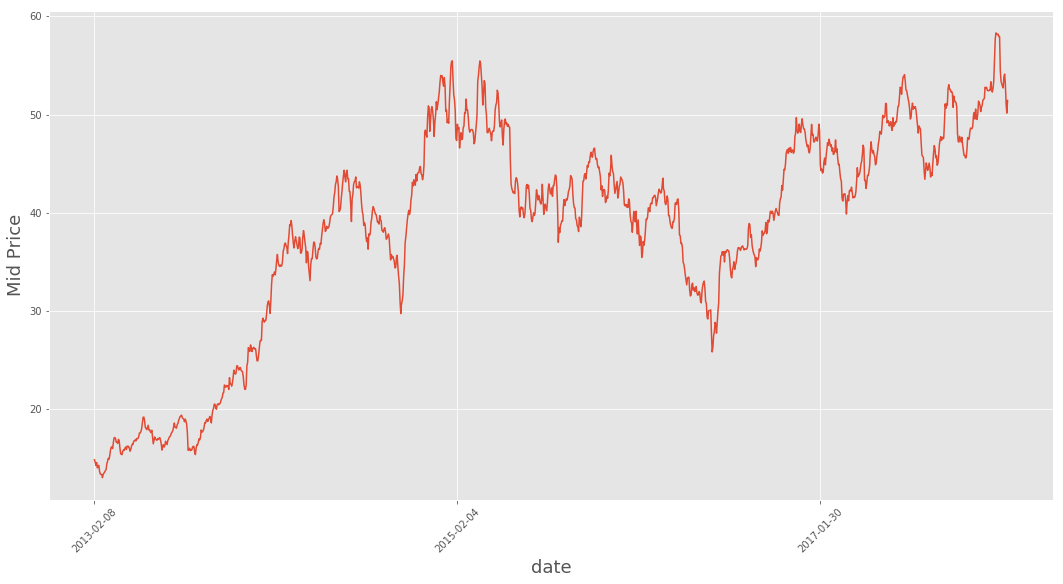

In [83]:
plt.figure(figsize = (18,9))
plt.plot(range(df2.shape[0]),(df2['low']+df2['high'])/2.0)
plt.xticks(range(0,df2.shape[0],500),df2['date'].loc[::500],rotation=45)
plt.xlabel('date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()
    

In [48]:
high_prices = df.loc[:,'high'].as_matrix()
low_prices = df.loc[:,'low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

In [75]:
train_data = mid_prices[:1000]
test_data = mid_prices[1000:]

In [84]:
scaler = preprocessing.MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [85]:
smoothing_window_size = 250
for di in range(0,1000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data 
# scaler.fit(train_data[di+smoothing_window_size:, :])
# train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [119]:
train_data = train_data.reshape(-1)
np.isnan(test_data)
test_data=np.nan_to_num(test_data)
# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [121]:
EMA = 0.0
gamma = 0.1
for ti in range(1000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)